# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.sample(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40734,23,student,single,professional.course,no,yes,no,cellular,sep,wed,...,1,8,2,success,-1.1,94.199,-37.5,0.876,4963.6,yes
24213,55,blue-collar,married,basic.9y,no,no,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,yes
7591,37,management,married,university.degree,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
34134,40,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
27656,37,admin.,single,university.degree,no,yes,yes,cellular,nov,fri,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
9059,35,technician,married,professional.course,no,yes,no,telephone,jun,thu,...,31,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
16519,33,management,married,high.school,no,yes,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
27742,38,technician,married,professional.course,no,yes,yes,cellular,mar,thu,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,yes
36596,30,admin.,married,professional.course,no,yes,no,cellular,jun,thu,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,no
33918,30,blue-collar,single,basic.9y,no,yes,no,cellular,may,wed,...,6,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no


In [7]:
# Exploratory data analysis
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
# Checking for missing values 
# Using a for loop to check for missing values for all columns

columns_to_check = [
    "age", "job", "marital", "education", "default", "housing", "loan",
    "previous", "poutcome", "day_of_week", "duration", "campaign", "pdays",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", 
    "euribor3m", 
    "nr.employed", "y"
]

for col in columns_to_check:
    print(f"{col}: {df[col].isna().sum()}")



age: 0
job: 0
marital: 0
education: 0
default: 0
housing: 0
loan: 0
previous: 0
poutcome: 0
day_of_week: 0
duration: 0
campaign: 0
pdays: 0
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 0
euribor3m: 0
nr.employed: 0
y: 0


## There appears to be no missing values. Upon further investigation of the data, it was determined that there are placeholders in the data set for missing values called "unknown".

In [10]:
# Counted 'unknown' values in each column
unknown_counts = (df == 'unknown').sum()

# Filter only columns that have at least one 'unknown'
unknown_counts = unknown_counts[unknown_counts > 0]

print("Number of 'unknown' entries per column:")
print(unknown_counts)


Number of 'unknown' entries per column:
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


In [19]:
# Checking value counts for all columns
df["job"].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [21]:
# Showing value counts for every column in the DataFrame
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: age
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

Column: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Column: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Column: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Column: default
default
no         32588
unknown     8597
yes            3
Name: count, dtype:

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

## Based on what I have explored in the data, the business objective is to predict which customers are most likely to subscribe to a long-term term deposit, so the bank can focus its marketing calls on those most likely to say “yes.”

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

# I will be doing exploratory data analysis (EDA) and generating some plots to understand the data better for feature selection

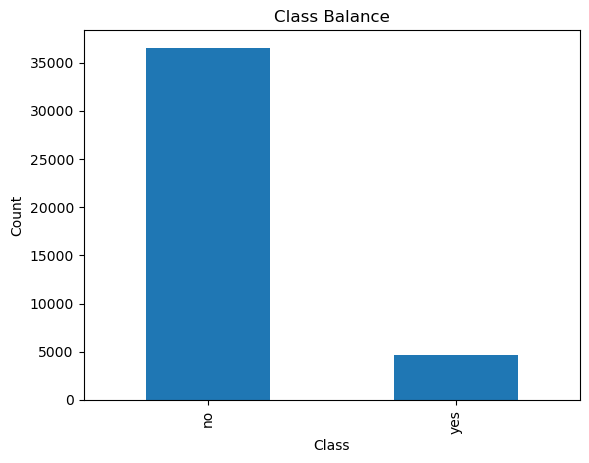

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Target variable y plot
def plot_class_balance(df, target='y'):
    counts = df[target].value_counts()
    plt.figure()
    counts.plot(kind='bar')
    plt.title('Class Balance')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# ---- Run EDA on the bank dataset ----
plot_class_balance(df, 'y')

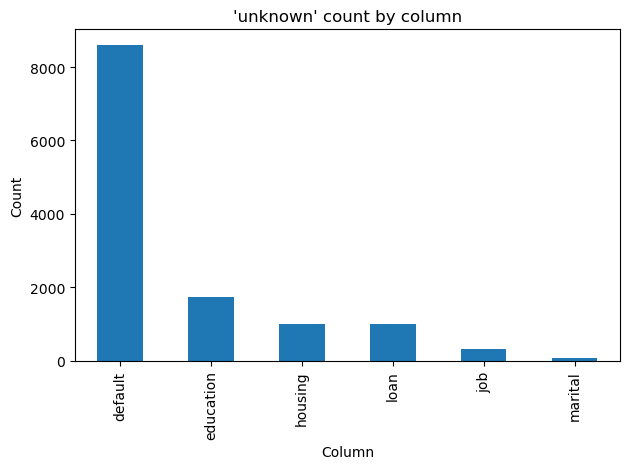

In [29]:
# Unknown-rate by column (categoricals)
def plot_unknown_rates(df):
    unknown_counts = (df == 'unknown').sum()
    mask = unknown_counts > 0
    unk = unknown_counts[mask].sort_values(ascending=False)
    if len(unk) == 0:
        print("No 'unknown' placeholders found.")
        return
    plt.figure()
    unk.plot(kind='bar')
    plt.title("'unknown' count by column")
    plt.xlabel('Column')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_unknown_rates(df)

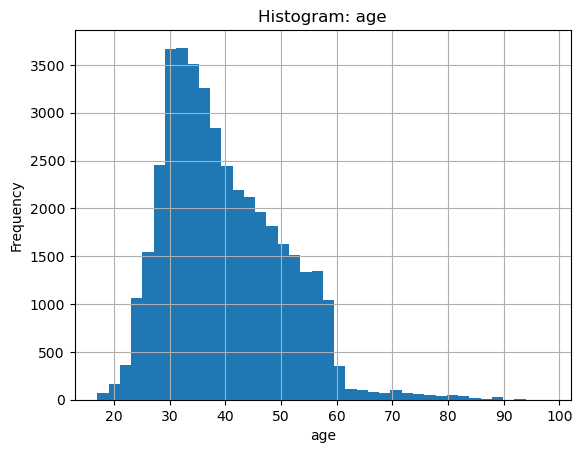

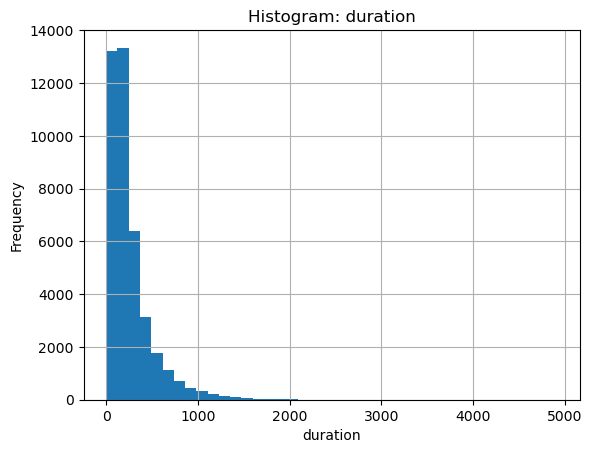

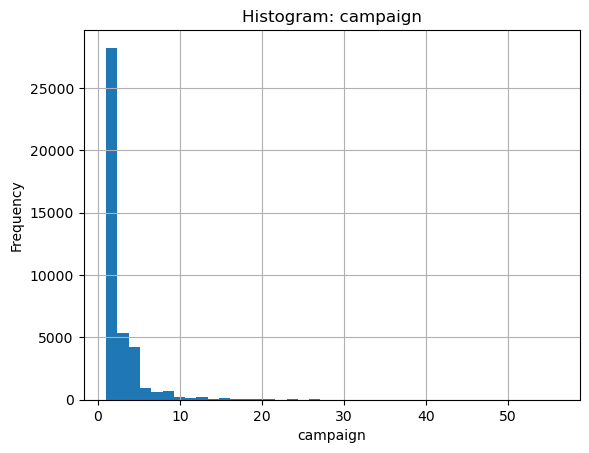

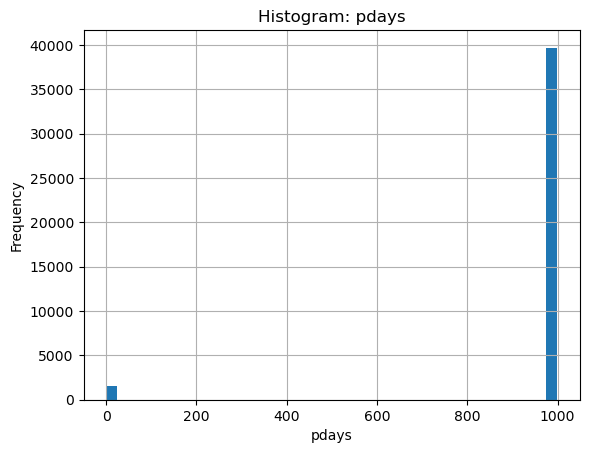

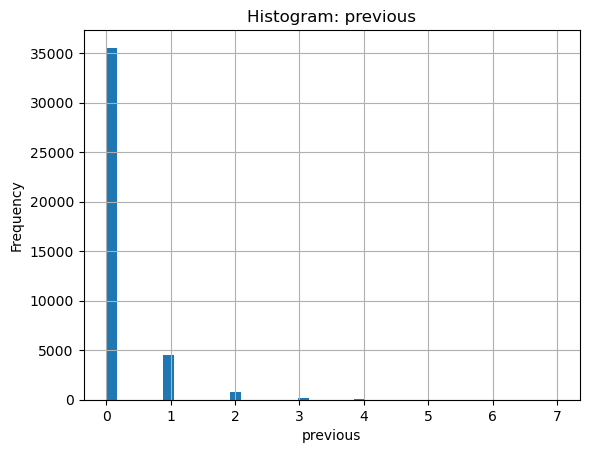

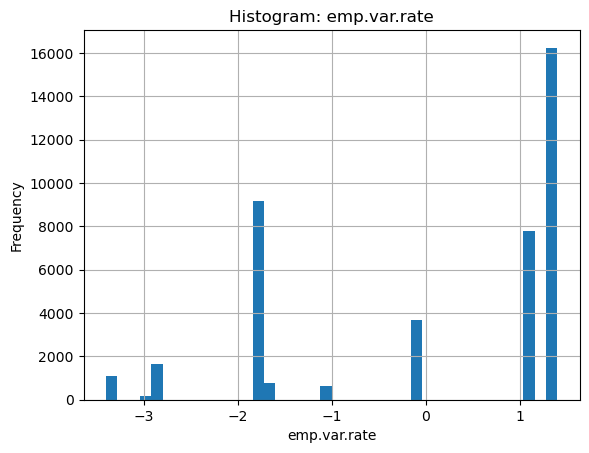

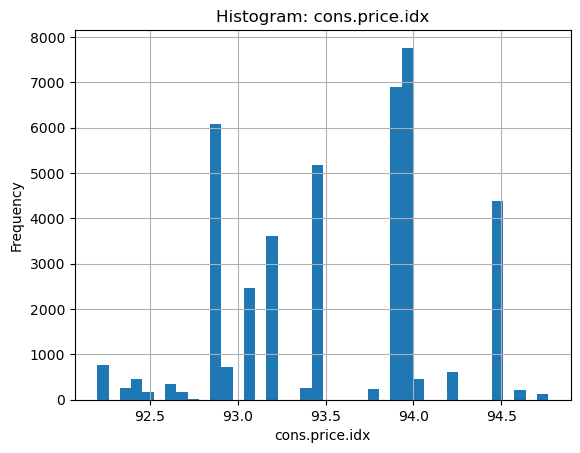

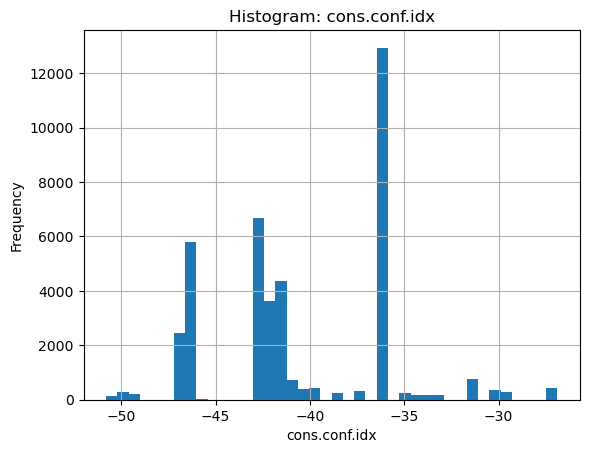

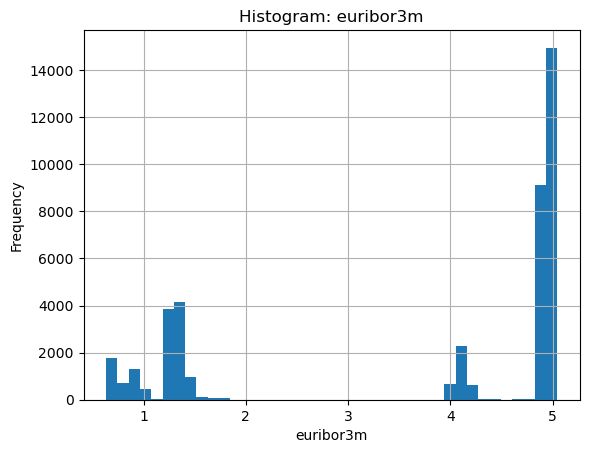

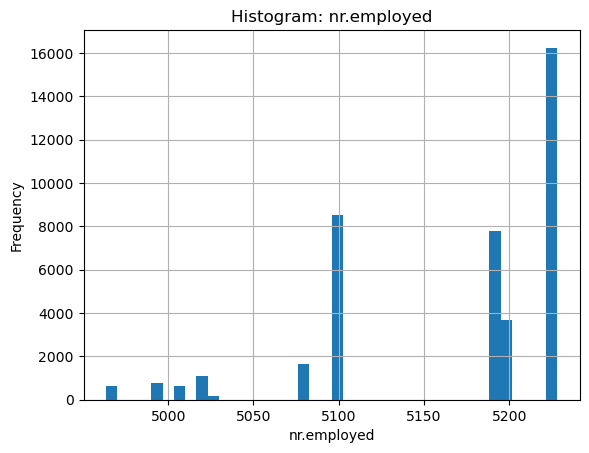

In [30]:
# Numeric histograms
def plot_numeric_hists(df, bins=30):
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    for c in num_cols:
        plt.figure()
        df[c].hist(bins=bins)
        plt.title(f'Histogram: {c}')
        plt.xlabel(c)
        plt.ylabel('Frequency')
        plt.show()

plot_numeric_hists(df, bins=40)


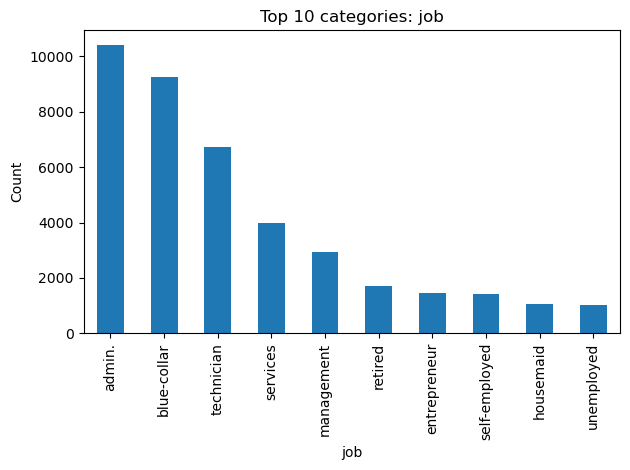

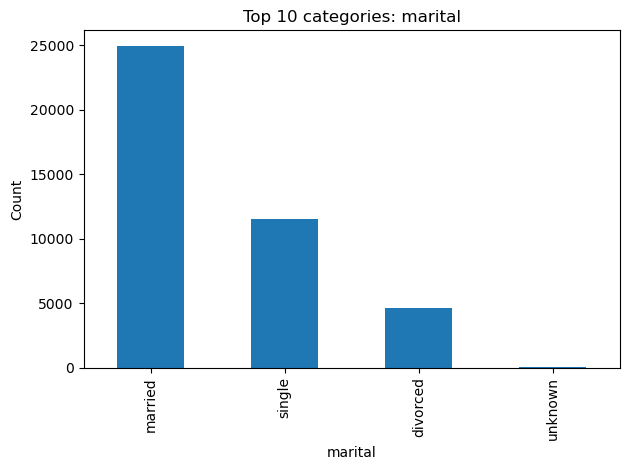

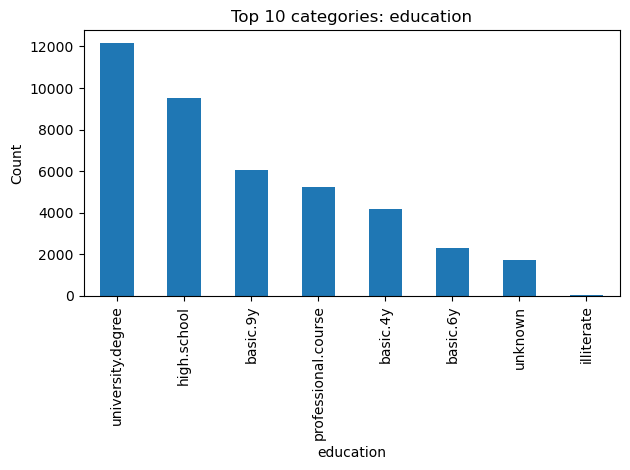

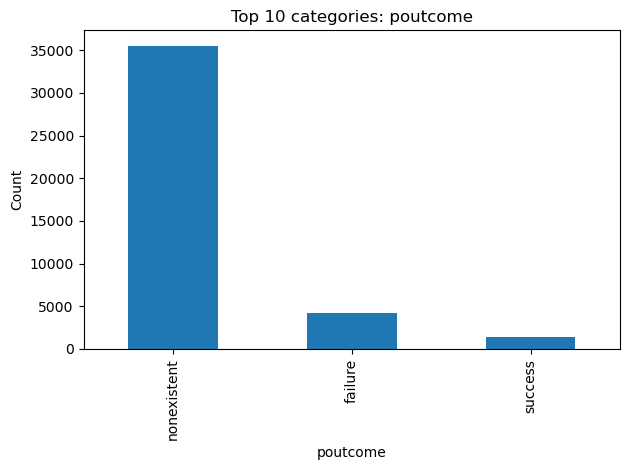

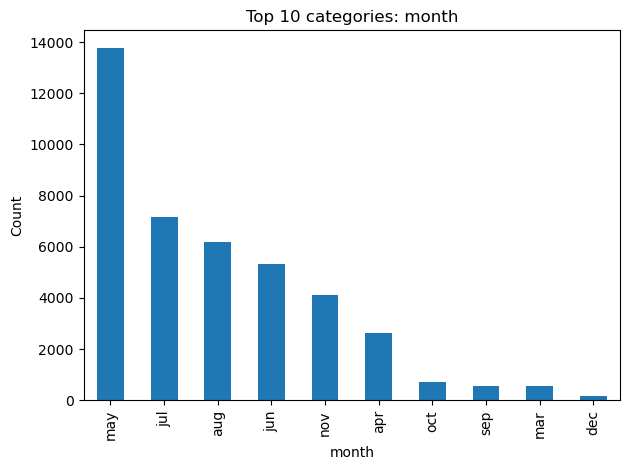

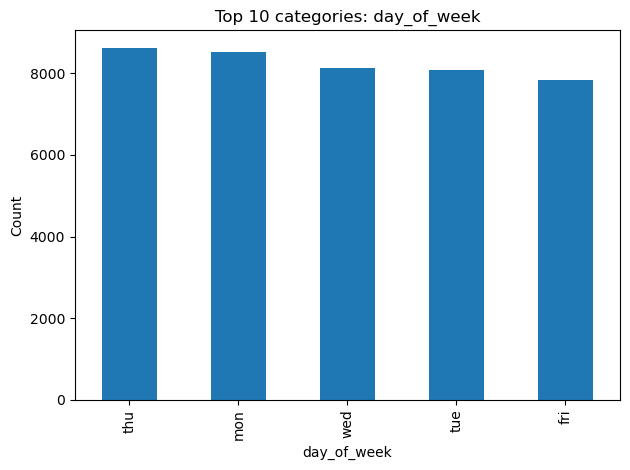

In [31]:
# Top categories for key categoricals
def plot_top_categories(df, cols, top_n=10):
    for c in cols:
        if df[c].dtype == 'object':
            vc = df[c].value_counts().head(top_n)
            plt.figure()
            vc.plot(kind='bar')
            plt.title(f'Top {top_n} categories: {c}')
            plt.xlabel(c)
            plt.ylabel('Count')
            plt.tight_layout()
            plt.show()

plot_top_categories(df, cols=['job','marital','education','poutcome','month','day_of_week'], top_n=10)

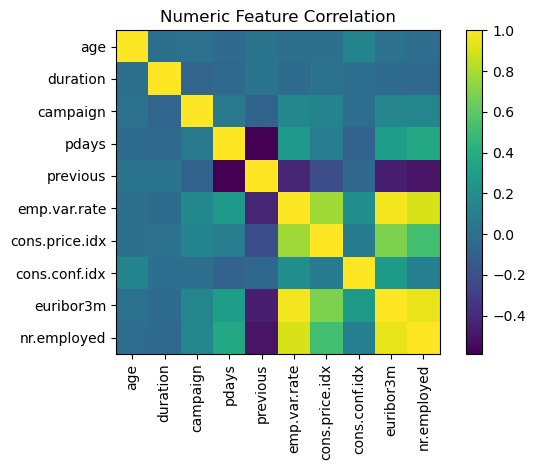

In [42]:
# Correlation heatmap (for numeric only)
def plot_corr_heatmap(df):
    num = df.select_dtypes(include=['int64','float64'])
    if num.shape[1] == 0:
        print("No numeric columns.")
        return
    corr = num.corr()
    plt.figure()
    plt.imshow(corr, interpolation='nearest')
    plt.title('Numeric Feature Correlation')
    plt.colorbar()
    ticks = np.arange(len(corr.columns))
    plt.xticks(ticks, corr.columns, rotation=90)
    plt.yticks(ticks, corr.columns)
    plt.tight_layout()
    plt.show()

plot_corr_heatmap(df)

## The indicators (emp.var.rate, euribor3m, nr.employed, cons.price.idx) are highly correlated with each other — this is expected because they often move together over time.

## previous and pdays have a moderate positive correlation (0.5), since they both relate to previous marketing contact history.


### I restricted the dataset to relevant bank info features, handled "unknown", and set up categorical encoding.

### I separated X and y, identified feature types, and created a ColumnTransformer that one-hot encodes categoricals while keeping numeric features as-is.

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Select only bank information features + target
bank_info_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
df_bank_info = df[bank_info_cols + ['y']].copy()

# Separate features (X) and target (y)
X = df_bank_info.drop(columns='y')
y = df_bank_info['y'].map({'yes': 1, 'no': 0})

# Categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Define the column transformer with one-hot encoding for categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols) #handle_unknown='ignore'
    ])



### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [47]:
# Split the data into train/test
# stratified to maintain class distribution for the target y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (32950, 7)
Test set shape: (8238, 7)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### This for the baseline model, I used a simple majority class baseline to predict the most frequent class for all cases which is "no". 

In [52]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Majority class baseline
dummy = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='most_frequent'))
])
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
baseline_majority_acc = accuracy_score(y_test, y_pred_dummy)

print(f"Majority Regression Accuracy: {baseline_majority_acc:.3f}")

Majority Regression Accuracy: 0.887


In [54]:
from sklearn.metrics import precision_score, recall_score

# From the above logistic regression code, calculating precision and recall
baseline_precision = precision_score(y_test, y_pred_dummy, zero_division=0)
baseline_recall = recall_score(y_test, y_pred_dummy, zero_division=0)

print(f"Precision: {baseline_precision:.3f}")
print(f"Recall: {baseline_recall:.3f}")

#precision_score: Of all the customers predicted as "yes", what fraction actually said "yes".
#recall_score: Of all the customers who actually said "yes", what fraction did the model correctly identify.


Precision: 0.000
Recall: 0.000


### Majority class accuracy is high (88.7%) because the dataset is imbalanced, but it will have 0 recall for the minority class (yes responses). We need a better model

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### I will continue with logistic regression. This provides a meaningful starting point that accounts for the features

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Logistic regression baseline
# Used a max iteration of 1000
log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
baseline_log_acc = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {baseline_log_acc:.3f}")


Logistic Regression Accuracy: 0.887


In [61]:
# From the above logistic regression code
precision = precision_score(y_test, y_pred_log, zero_division=0)
recall = recall_score(y_test, y_pred_log, zero_division=0)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

#precision_score: Of all the customers predicted as "yes", what fraction actually said "yes".
#recall_score: Of all the customers who actually said "yes", what fraction did the model correctly identify.


Precision: 0.000
Recall: 0.000


### The model predicted all samples as “No”, so it never correctly identified a positive case. This happens because:
### The dataset is highly imbalanced (~89% “No”, 11% “Yes”) as shown in the graphs

In [65]:
# Tried running class_weight='balanced' on the Logistic Regression to improve recall and precision
log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
baseline_log_acc = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {baseline_log_acc:.3f}")

precision = precision_score(y_test, y_pred_log, zero_division=0)
recall = recall_score(y_test, y_pred_log, zero_division=0)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")


Logistic Regression Accuracy: 0.584
Precision: 0.158
Recall: 0.623


### Of all the customers who actually said "yes", now 62.3% the model correctly identify compared to zero from before. This has improved recall. However, precision is still low at ~16 %.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [72]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# When I tried using the whole dataset, I get a windows runtime error. 
# After some research, using a smaller stratified sample of the training set for speed
sss = StratifiedShuffleSplit(n_splits=1, train_size=6000, random_state=42)
train_idx, _ = next(sss.split(X_train, y_train))
X_train_sub = X_train.iloc[train_idx].copy()
y_train_sub = y_train.iloc[train_idx].copy()


# Models using default settings
models = {
    "Logistic": LogisticRegression(max_iter=1000, class_weight='balanced'),  # with balanced class weight 
    "KNN": KNeighborsClassifier(),                         # default n_neighbors=5
    "Decision Tree": DecisionTreeClassifier(random_state=42),  # depth=None
    "SVM": SVC()                                           # default RBF kernel
}

rows = []
for name, clf in models.items():
    pipe = Pipeline([('preprocessor', preprocessor), ('classifier', clf)])
    start = time.time()
    pipe.fit(X_train_sub, y_train_sub)
    train_time = time.time() - start

    y_pred_train = pipe.predict(X_train_sub)
    y_pred_test  = pipe.predict(X_test)

    rows.append({
        "Model": name,
        "Train Time (s)": round(train_time, 3),
        "Train Accuracy": round(accuracy_score(y_train_sub, y_pred_train), 3),
        "Test Accuracy": round(accuracy_score(y_test,  y_pred_test), 3)
    })

results_df = pd.DataFrame(rows).sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)
results_df


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,SVM,1.077,0.887,0.887
1,KNN,0.032,0.893,0.878
2,Decision Tree,0.130,0.949,0.832
3,Logistic,0.355,0.623,0.600


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [76]:
# Could not find a column which states Gender 

# Hyperparameter Tuning & Grid Search
from sklearn.model_selection import GridSearchCV

# Tune KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print(f"Best score: {grid_search.best_score_:.3f}")


Best params: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Best score: 0.135


### The best-performing KNN model used 3 nearest neighbors. Instead of all neighbors voting equally, closer neighbors have more influence on the prediction. The mean F1-Score is 0.135. 

In [78]:
#  Adjusting the Performance Metric
#  Better metrics using F1-score, ROC AUC, Precision Recall AUC

from sklearn.metrics import classification_report

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


              precision    recall  f1-score   support

          No       0.92      0.58      0.71      7310
         Yes       0.16      0.62      0.25       928

    accuracy                           0.58      8238
   macro avg       0.54      0.60      0.48      8238
weighted avg       0.84      0.58      0.66      8238



In [ ]:
# Setting up GridSearchCV for all four models, optimize them for F1-score, and compare them using accuracy, precision, recall, and F1.
# 

import time
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# -------------------------------
# Pipelines
# -------------------------------
pipes = {
    "Logistic Regression": Pipeline([
        ('preprocessor', preprocessor),
        ('clf', LogisticRegression(max_iter=1000, ))
    ]),
    "KNN": Pipeline([
        ('preprocessor', preprocessor),
        ('clf', KNeighborsClassifier())
    ]),
    "Decision Tree": Pipeline([
        ('preprocessor', preprocessor),
        ('clf', DecisionTreeClassifier(random_state=42))
    ]),
    "SVM": Pipeline([
        ('preprocessor', preprocessor),
        ('clf', SVC())  # RBF kernel by default
    ]),
}

# -------------------------------
# Modest parameter grids (tuned for F1)
# -------------------------------
param_grids = {
    "Logistic Regression": {
        'clf__C': [0.1, 1, 10],
        'clf__class_weight': [None, 'balanced']
    },
    "KNN": {
        'clf__n_neighbors': [3, 5, 11, 21],
        'clf__weights': ['uniform', 'distance']
    },
    "Decision Tree": {
        'clf__max_depth': [5, 10, None],
        'clf__min_samples_split': [2, 20, 50],
        'clf__class_weight': [None, 'balanced']
    },
    "SVM": {
        'clf__kernel': ['linear', 'rbf'],
        'clf__C': [0.5, 1, 4],
        'clf__gamma': ['scale']  # keep simple
    }
}

# -------------------------------
# Helper: tune and evaluate
# -------------------------------
def tune_and_eval(name, pipe, grid, X_tr, y_tr, X_te, y_te, scoring='f1'):
    # Keep parallelism low to avoid [WinError 1450]
    gs = GridSearchCV(
        pipe, param_grid=grid, cv=3, scoring=scoring,
        n_jobs=1, pre_dispatch=1, refit=True, verbose=0
    )
    t0 = time.time()
    gs.fit(X_tr, y_tr)
    fit_time = time.time() - t0

    best = gs.best_estimator_
    y_pred = best.predict(X_te)

    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)

    return {
        "Model": name,
        "Best Params": gs.best_params_,
        "CV F1 (mean)": round(gs.best_score_, 3),
        "Fit Time (s)": round(fit_time, 2),
        "Test Accuracy": round(acc, 3),
        "Test Precision": round(prec, 3),
        "Test Recall": round(rec, 3),
        "Test F1": round(f1, 3)
    }

# -------------------------------
# Run all four models
# -------------------------------
rows = []
for name in ["Logistic Regression", "KNN", "Decision Tree", "SVM"]:
    rows.append(
        tune_and_eval(name, pipes[name], param_grids[name],
                      X_train_sub, y_train_sub, X_test, y_test, scoring='f1')
    )

results_df = pd.DataFrame(rows).sort_values(by="Test F1", ascending=False).reset_index(drop=True)

# Show results
pd.set_option('display.max_colwidth', 120)
results_df


## Model Interpretation
SVM had the highest raw accuracy but classified very low positives. Therefore, it is not useful for this business problem.

KNN performed well in accuracy but extremely poorly in recall (missed ~90% of subscribers).

Decision Tree gave balanced precision/recall but still underperformed logistic regression on recall.

Logistic Regression with class_weight='balanced' produced the highest recall (0.578) and the best F1-score (0.246) among the models. While accuracy was lower, recall is the more important measure here.

## Justification for Final Model
Logistic Regression (balanced) is the preferred final model because:

High Recall. Therefore, it catches more potential subscribers, reducing missed opportunities.

Best F1-score among tuned models → balances precision and recall better than others.

Interpretability: coefficients show which customer attributes influence subscription likelihood, aiding in marketing strategy design.

Simplicity: fast to train, easy to deploy, and less prone to overfitting than deeper trees or complex kernels.

##### Questions